In [81]:
import os, sys

In [82]:
sys.path.append('../')

In [83]:
from core.models import UNet_torch_like_keras

In [84]:
src_folder = '/storage/yw18581/src/leaf_reco/'

In [85]:
model= UNet_torch_like_keras

In [7]:
trained = os.path.join(src_folder,'saved_models', 'trained_UNet_pytorch_keras-like_100epochs.pkl')

In [111]:
import torch

In [1]:
root_folder = '/storage/yw18581/data/dataset/'

In [2]:
import re
import numpy as np

In [3]:
dist_list = [2, 4, 10, 25]

In [4]:
keys=['first', 'second']

In [5]:
excluded=[]

In [10]:
def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))

In [71]:
def select_dist(root_folder, dist_list = None, keys_list=None):
    regex = re.compile(r'\d+')
    def hasNumbers(inputString):
        return bool(re.search(r'\d', inputString))
    selected=[]
    if dist_list:
        for dist in dist_list:
            for root, dirs, _ in os.walk(root_folder):
                for d in dirs:
                    if keys_list:
                        for k in keys_list:
                            if k in d:
                                if hasNumbers(d):
                                    if int(regex.findall(d)[-1]) == dist:
                                        selected.append(d)
                    else:
                        if hasNumbers(d):
                            if int(regex.findall(d)[-1]) == dist:
                                selected.append(d)
    else:
        for root, dirs, _ in os.walk(root_folder):
            for d in dirs:
                if keys_list:
                    for k in keys_list:
                        if k in d:
                            if hasNumbers(d):
                                selected.append(d)
                else:
                    return
    return selected 

In [79]:
selected_distances = select_dist(dist_list=[2, 4, 10, 25], root_folder=root_folder, keys_list=['first'])

In [76]:
excluded_distances = select_dist(root_folder=root_folder, keys_list=['second', 'third'])

In [80]:
selected_distances

['10x10_2mm_first_clean',
 '10x10_4mm_first_clean',
 '10x10_10mm_first_clean',
 '10x10_25mm_first_clean']

In [78]:
excluded_distances

['10x10_10mm_second_clean',
 '10x10_15mm_second_clean',
 '10x10_1mm_second_clean',
 '10x10_20mm_second_clean',
 '10x10_25mm_second_clean',
 '10x10_2mm_second_clean',
 '10x10_30mm_second_clean',
 '10x10_35mm_second_clean',
 '10x10_3mm_second_clean',
 '10x10_4mm_second_clean',
 '10x10_10mm_third_clean',
 '10x10_15mm_third_clean',
 '10x10_1mm_third_clean',
 '10x10_20mm_third_clean',
 '10x10_25mm_third_clean',
 '10x10_2mm_third_clean',
 '10x10_30mm_third_clean',
 '10x10_35mm_third_clean',
 '10x10_3mm_third_clean',
 '10x10_4mm_third_clean']

In [86]:
from core.utils.data import define_dataset

In [95]:
data_loader, data_len = define_dataset(root_folder=root_folder,include_list=selected_distances,
                                       excluded_list=excluded_distances,multi_processing=4)

In [96]:
data_len

{'train': 768, 'val': 192, 'test': 240}

In [107]:
for i, batch in enumerate(data_loader['train']):
    print(batch['image'].shape)

torch.Size([16, 1, 350, 350])
torch.Size([16, 1, 350, 350])
torch.Size([16, 1, 350, 350])
torch.Size([16, 1, 350, 350])
torch.Size([16, 1, 350, 350])
torch.Size([16, 1, 350, 350])
torch.Size([16, 1, 350, 350])
torch.Size([16, 1, 350, 350])
torch.Size([16, 1, 350, 350])
torch.Size([16, 1, 350, 350])
torch.Size([16, 1, 350, 350])
torch.Size([16, 1, 350, 350])


KeyboardInterrupt: 

In [108]:
trained_unet = os.path.join(src_folder, 'saved_models','trained_UNet_4positions_firstbatch')

In [109]:
history_filepath = os.path.join(trained_unet, 'history_Trained_UNet_pytorch_100epochs_.pkl')

In [114]:
loaded_hist = np.load(history_filepath, allow_pickle=True)

In [115]:
loaded_hist.keys()

dict_keys(['train', 'val', 'train_dice', 'train_mse', 'val_dice', 'val_mse', 'epochs'])

In [116]:
epochs = loaded_hist['epochs']

In [118]:
import matplotlib.pyplot as plt

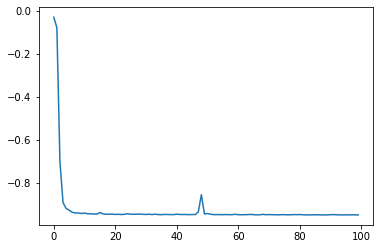

In [119]:
plt.plot(epochs,loaded_hist['train'])

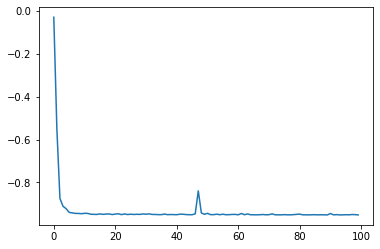

In [120]:
plt.plot(epochs,loaded_hist['val'])

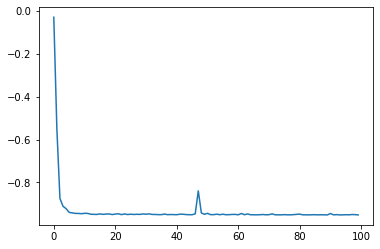

In [121]:
plt.plot(epochs,loaded_hist['val_dice'])

In [123]:
np.min(loaded_hist['val_dice'])

-0.9510052253802618